# 常用的 DataFrame 操作
* merge / transform
* subset
* groupby

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# 設定 data_path
dir_data = '../data/Part01/'

In [3]:
file_path = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (file_path))

Path of read in data: ../data/Part01/application_train.csv


In [4]:
df = pd.read_csv(file_path)

In [5]:
# [0]:'0 個小孩'
d = ({ range(1,3):'1 - 2 個小孩',
                    range(3, 6):'3 - 5 個小孩',
                      range(5, 20):'超過 5 個小孩'})

df['new_cat'] = df['CNT_CHILDREN'].apply(lambda x: next((v for k, v in d.items() if x in k), '0 個小孩'))


In [6]:
criteria = [df['CNT_CHILDREN'].between(0, 0.9), df['CNT_CHILDREN'].between(1, 2), df['CNT_CHILDREN'].between(3, 5), df['CNT_CHILDREN'].between(6, 20)]
value = ['0 c', '1-2 c', '3-5 c', '6 more c']
c = np.select(criteria, value, 0)

In [9]:
CNT_CHILDREN_GROUP = df.groupby('new_cat')

In [8]:
#1
"""
Your code here
"""
cut_rule = [np.inf, 1, 2, 3, 25, 50, 100]

df['CNT_CHILDREN_GROUP'] = pd.cut(df['CNT_CHILDREN'], cut_rule, include_lowest=True)
df['CNT_CHILDREN_GROUP'].value_counts()

ValueError: bins must increase monotonically.

## 作業
1. 請將 app_train 中的 CNT_CHILDREN 依照下列規則分為四組，並將其結果在原本的 dataframe 命名為 CNT_CHILDREN_GROUP
    * 0 個小孩
    * 有 1 - 2 個小孩
    * 有 3 - 5 個小孩
    * 有超過 5 個小孩

2. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，列出各組的平均 AMT_INCOME_TOTAL，並繪製 baxplot
3. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，對 AMT_INCOME_TOTAL 計算 [Z 轉換](https://en.wikipedia.org/wiki/Standard_score) 後的分數

In [ ]:
#2-1
"""
Your code here
"""
grp = 

grouped_df = app_train.groupby(grp)['AMT_INCOME_TOTAL']
grouped_df.mean()

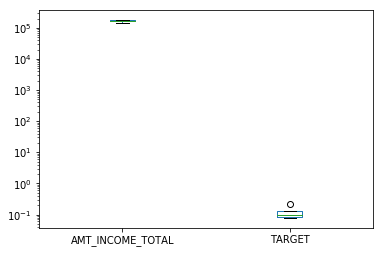

In [26]:
CNT_CHILDREN_GROUP[['AMT_INCOME_TOTAL','TARGET']].mean().plot(kind='box', logy=True)

0 個小孩             AxesSubplot(0.1,0.559091;0.363636x0.340909)
1 - 2 個小孩    AxesSubplot(0.536364,0.559091;0.363636x0.340909)
3 - 5 個小孩             AxesSubplot(0.1,0.15;0.363636x0.340909)
超過 5 個小孩         AxesSubplot(0.536364,0.15;0.363636x0.340909)
dtype: object

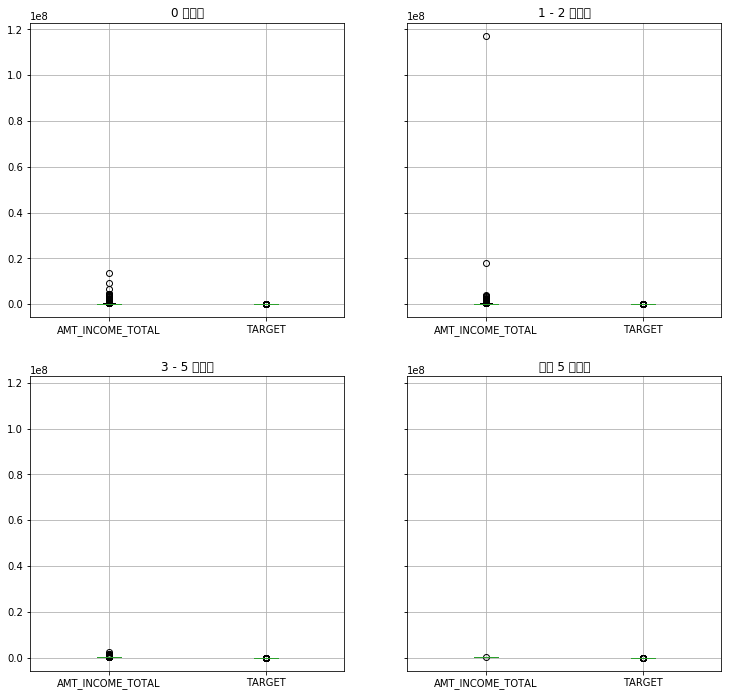

In [95]:
CNT_CHILDREN_GROUP.boxplot(column=['AMT_INCOME_TOTAL', 'TARGET'], figsize=(12,12))

In [ ]:
#3
"""
Your code here
"""
app_train['AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET'] = grouped_df.apply(lambda x: )

app_train[['AMT_INCOME_TOTAL','AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET']].head()

In [76]:
# (CNT_CHILDREN_GROUP['AMT_INCOME_TOTAL'] - CNT_CHILDREN_GROUP['AMT_INCOME_TOTAL'].mean())/
CNT_CHILDREN_GROUP.apply(lambda x: (x['AMT_INCOME_TOTAL'] - x['AMT_INCOME_TOTAL'].mean())/x['AMT_INCOME_TOTAL'].std())

new_cat         
0 個小孩     0         0.345856
          1         0.990553
          2        -0.943538
          3        -0.298841
          4        -0.427780
          5        -0.642679
          7         1.850149
          8        -0.513740
          9        -0.298841
          11       -1.221291
          12       -0.943538
          14        0.216917
          15       -0.083942
          16       -0.556719
          18       -0.513740
          20       -0.298841
          23       -0.793108
          25       -0.728639
          26       -0.513740
          28        0.990553
          29       -0.728639
          30        1.205452
          31       -0.513740
          32       -0.728639
          34       -0.298841
          35       -0.513740
          37       -0.427780
          38       -0.642679
          39        0.130957
          40        0.345856
                      ...   
超過 5 個小孩  76087    -0.177378
          78972    -1.104749
          80948     2.6047

In [45]:
# CNT_CHILDREN_GROUP['AMT_INCOME_TOTAL'].transform('sum')
# -CNT_CHILDREN_GROUP['AMT_INCOME_TOTAL'].mean()

0         3.581377e+10
1         3.581377e+10
2         3.581377e+10
3         3.581377e+10
4         3.581377e+10
5         3.581377e+10
6         1.535280e+10
7         3.581377e+10
8         3.581377e+10
9         3.581377e+10
10        1.535280e+10
11        3.581377e+10
12        3.581377e+10
13        1.535280e+10
14        3.581377e+10
15        3.581377e+10
16        3.581377e+10
17        1.535280e+10
18        3.581377e+10
19        1.535280e+10
20        3.581377e+10
21        1.535280e+10
22        1.535280e+10
23        3.581377e+10
24        1.535280e+10
25        3.581377e+10
26        3.581377e+10
27        1.535280e+10
28        3.581377e+10
29        3.581377e+10
              ...     
307481    3.581377e+10
307482    3.581377e+10
307483    3.581377e+10
307484    3.581377e+10
307485    1.535280e+10
307486    1.535280e+10
307487    3.581377e+10
307488    3.581377e+10
307489    3.581377e+10
307490    3.581377e+10
307491    1.535280e+10
307492    3.581377e+10
307493    3

In [56]:
import scipy.stats as ss

In [59]:
S = CNT_CHILDREN_GROUP['AMT_INCOME_TOTAL'].mean()

In [91]:
(S-S.mean())/S.std()

new_cat
0 個小孩        0.052500
1 - 2 個小孩    0.733051
3 - 5 個小孩    0.644369
超過 5 個小孩    -1.429919
Name: AMT_INCOME_TOTAL, dtype: float64

In [66]:
pd.Series(ss.zscore(S, ddof=1), S.index)

new_cat
0 個小孩        0.052500
1 - 2 個小孩    0.733051
3 - 5 個小孩    0.644369
超過 5 個小孩    -1.429919
dtype: float64

In [67]:
zscore = lambda x: (x - x.mean()) / x.std()

In [68]:
CNT_CHILDREN_GROUP['AMT_INCOME_TOTAL'].transform(zscore)


0         0.345856
1         0.990553
2        -0.943538
3        -0.298841
4        -0.427780
5        -0.642679
6        -0.009056
7         1.850149
8        -0.513740
9        -0.298841
10       -0.151257
11       -1.221291
12       -0.943538
13        0.122206
14        0.216917
15       -0.083942
16       -0.556719
17       -0.227826
18       -0.513740
19       -0.205949
20       -0.298841
21        0.067513
22        0.669130
23       -0.793108
24       -0.096564
25       -0.728639
26       -0.513740
27       -0.151257
28        0.990553
29       -0.728639
            ...   
307481    0.560755
307482    0.560755
307483   -0.642679
307484    3.569341
307485    0.231590
307486    0.286283
307487   -0.470760
307488   -0.083942
307489    0.560755
307490   -0.814598
307491   -0.205949
307492    3.999139
307493   -0.298841
307494    0.231590
307495    0.130957
307496    1.850149
307497    0.130957
307498    0.302877
307499   -0.814598
307500    0.904594
307501   -0.820210
307502   -0.

In [77]:
CNT_CHILDREN_GROUP['AMT_INCOME_TOTAL'].apply(zscore)

0         0.345856
1         0.990553
2        -0.943538
3        -0.298841
4        -0.427780
5        -0.642679
6        -0.009056
7         1.850149
8        -0.513740
9        -0.298841
10       -0.151257
11       -1.221291
12       -0.943538
13        0.122206
14        0.216917
15       -0.083942
16       -0.556719
17       -0.227826
18       -0.513740
19       -0.205949
20       -0.298841
21        0.067513
22        0.669130
23       -0.793108
24       -0.096564
25       -0.728639
26       -0.513740
27       -0.151257
28        0.990553
29       -0.728639
            ...   
307481    0.560755
307482    0.560755
307483   -0.642679
307484    3.569341
307485    0.231590
307486    0.286283
307487   -0.470760
307488   -0.083942
307489    0.560755
307490   -0.814598
307491   -0.205949
307492    3.999139
307493   -0.298841
307494    0.231590
307495    0.130957
307496    1.850149
307497    0.130957
307498    0.302877
307499   -0.814598
307500    0.904594
307501   -0.820210
307502   -0.

In [92]:
CNT_CHILDREN_GROUP['AMT_INCOME_TOTAL'].apply(ss.zscore)

new_cat
0 個小孩        [0.34585721963426735, 0.9905557273232661, -0.9...
1 - 2 個小孩    [-0.009056425190450017, -0.15125764243487497, ...
3 - 5 個小孩    [-0.02325878505780375, -0.3420781296004635, -1...
超過 5 個小孩     [-0.8678439964338143, 0.13334255395850014, -0....
Name: AMT_INCOME_TOTAL, dtype: object